# PLUS

In [11]:
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

batch_size = 256
train_iter, test_iter = d2l.xn_load_data_mnist(batch_size)

In [12]:
class my_model():
    def __init__(self,num_hiddens,num_epochs,num_lr) -> None:
        self.num_hiddens = num_hiddens
        self.num_epochs = num_epochs
        self.num_lr = num_lr
        self.num_inputs, self.num_outputs = 784, 10
        self.params = self.init_params()
        self.W1 = self.params[0]
        self.b1 = self.params[1]
        self.W2 = self.params[2]
        self.b2 = self.params[3]

    def init_params(self):
        W1 = nn.Parameter(torch.randn(self.num_inputs, self.num_hiddens, requires_grad=True) * 0.01)
        b1 = nn.Parameter(torch.zeros(self.num_hiddens, requires_grad=True))
        W2 = nn.Parameter(torch.randn(self.num_hiddens, self.num_outputs, requires_grad=True) * 0.01)
        b2 = nn.Parameter(torch.zeros(self.num_outputs, requires_grad=True))
        params = [W1, b1, W2, b2]
        return params
    
    def relu(self,X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    
    def net(self,X):
        X = X.reshape((-1, 784))
        H = self.relu(X @ self.W1 + self.b1)
        # H = torch.sigmoid(X @ self.W1 + self.b1)
        return (H @ self.W2 + self.b2)
    
    def loss(self,y_hat, y):
        return nn.CrossEntropyLoss(reduction='none')(y_hat, y)
    
    def traning(self,train_iter,test_iter):
        updater = torch.optim.SGD(self.params, lr=self.num_lr)
        d2l.train_ch3(self.net, train_iter, test_iter, self.loss, self.num_epochs, updater)
        
    def get_mnist_labels(self,y):
        return (np.array(y,dtype='int32'))
    
    def predict(self, test_iter, rows=1, cols=6):
        for X, y in test_iter:
            break
        trues = self.get_mnist_labels(y)
        preds = self.get_mnist_labels(self.net(X).argmax(axis=1))
        titles = ["lab:"+str(true) +' ' + "pred:" +str(pred) for true, pred in zip(trues, preds)]
        d2l.show_images(
            X[0:cols*rows].reshape((cols*rows, 28, 28)), rows, cols, titles=titles[0:cols*rows], scale= 2.0)
        


# 训练一个模型

test_acc:0.9816


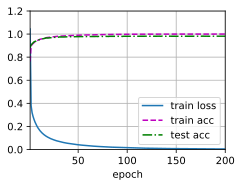

In [16]:
my_model1 = my_model(num_hiddens=256,num_epochs=200,num_lr=0.1) # num_epochs=15
my_model1.traning(train_iter,test_iter)

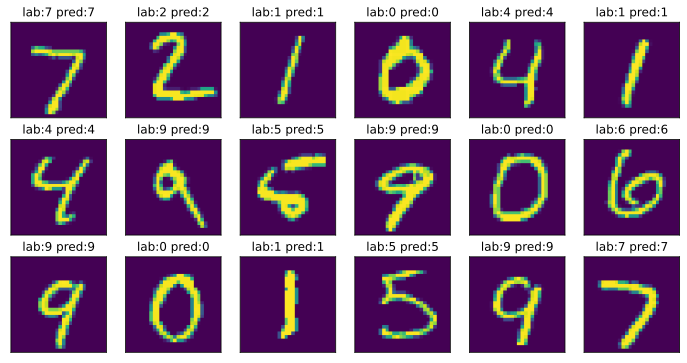

In [22]:
my_model1.predict(test_iter, rows=3, cols=6)

# 测试不同隐藏层大小对模型的影响

In [14]:
params_hidden = [64,128,256]
models = []
for index in range(3):
    model= my_model(num_hiddens=params_hidden[index],num_epochs=10,num_lr=0.1)
    models.append(model)

test_acc:0.9628
训练模型1: 64 个隐藏单元


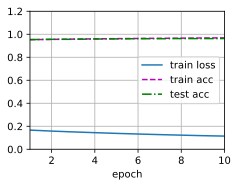

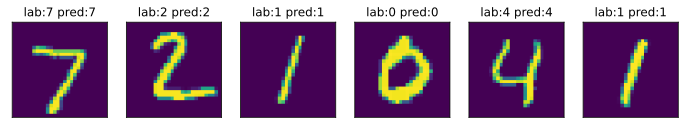

In [24]:
models[0].traning(train_iter,test_iter)
models[0].predict(test_iter)
print("训练模型1:",params_hidden[0],"个隐藏单元")

test_acc:0.9475
训练模型2: 128 个隐藏单元


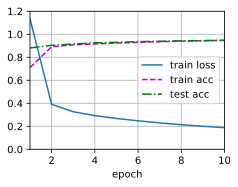

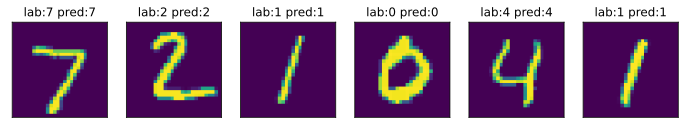

In [ ]:
models[1].traning(train_iter,test_iter)
models[1].predict(test_iter)
print("训练模型2:",params_hidden[1],"个隐藏单元")

test_acc:0.9496
训练模型3: 256 个隐藏单元


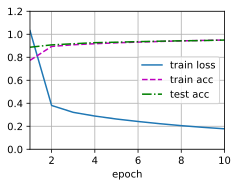

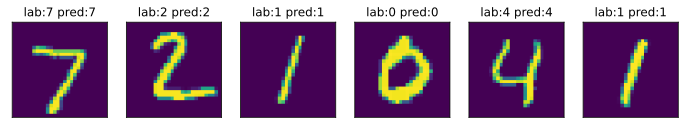

In [ ]:
models[2].traning(train_iter,test_iter)
models[2].predict(test_iter)
print("训练模型3:",params_hidden[2],"个隐藏单元")

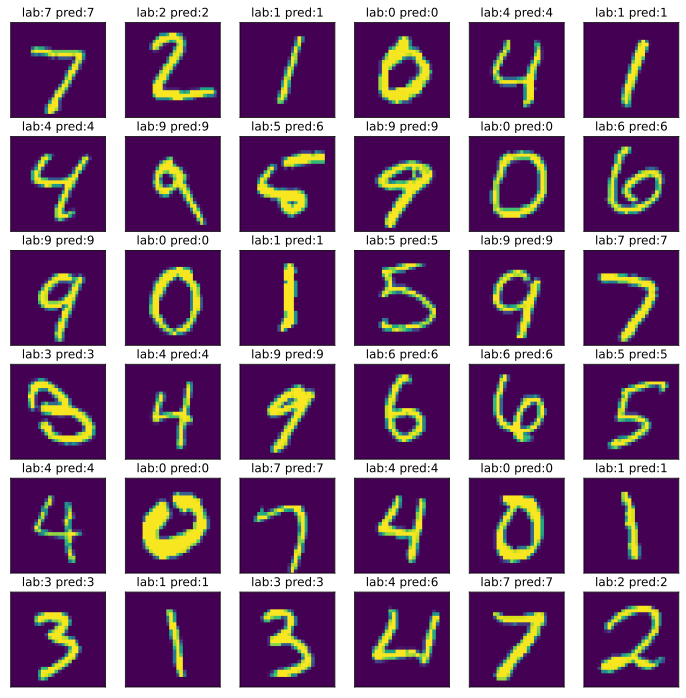

In [ ]:
models[2].predict(test_iter, rows=6, cols=6)